In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
## ライブラリ
import tensorflow as tf
import keras
import keras.models as models
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape, Permute #Layer, 
from keras.layers.convolutional import Convolution2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.callbacks import ModelCheckpoint

import os
import glob
import time
import cv2
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

print(np.__version__)
print(cv2.__version__)
print(matplotlib.__version__)
print(tf.__version__)
print(keras.__version__)

1.19.5
4.1.2
3.2.2
2.4.1
2.4.3


In [23]:
DH = 360
DW = 480
n_class = 3
unimochi = [0,0,0]
grass = [0, 248, 51]
imochi = [255,0,1]
label_colours = np.array([unimochi, grass, imochi])
img_size = (360, 480)

In [24]:
def normalized(rgb):
    return rgb / 255.

def load_img(test_img_path):
  data = []
  DH = 360
  DW = 480

  #test_img = glob.glob(test_img_path)
  #basename = os.path.basename(glob.glob(test_img_path)[0])
  basename = os.path.basename(test_img_path)
  file_name = os.path.splitext(basename)[0]

  test_img = cv2.imread(test_img_path)

  H = test_img.shape[0]
  W = test_img.shape[1]

  for h in range(int(H/DH)):
    for w in range(int(W/DW)):
      img = test_img[h*DH:(h+1)*DH, w*DW:(w+1)*DW]
      data.append(np.rollaxis(normalized(img),2))
  data_array = np.array(data)
  test_data = data_array.transpose((0, 2, 3, 1))
  return test_data, file_name, H, W

def visualize(temp, plot=True):
    r = temp.copy()
    g = temp.copy()
    b = temp.copy()
    for l in range(0,n_class):
        r[temp==l]=label_colours[l,0]
        g[temp==l]=label_colours[l,1]
        b[temp==l]=label_colours[l,2]

    rgb = np.zeros((temp.shape[0], temp.shape[1], 3))
    rgb[:,:,0] = (r/255.0)
    rgb[:,:,1] = (g/255.0)
    rgb[:,:,2] = (b/255.0) 
    if plot:
        plt.imshow(rgb)
    else:
        return rgb

def save_result(output, file_name, H, W):
  n = 0
  DH = 360
  DW = 480
  result = np.zeros((DH*int(H/DH), DW*int(W/DW), 3))

  for h in range(int(H/DH)):
    for w in range(int(W/DW)):
      pred_class = np.argmax(output[n], axis=1).reshape(img_size)
      img_ret = visualize(pred_class, False)
      result[h*DH:(h+1)*DH, w*DW:(w+1)*DW] = img_ret
      n=n+1

  plt.imshow(result)
  matplotlib.image.imsave("/content/drive/MyDrive/SegmentationTask_of_RiceBlast/results/" + file_name +"_result.png", result)
  return result

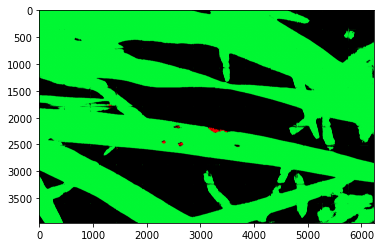

In [27]:
test_img_path = "/content/drive/MyDrive/SegmentationTask_of_RiceBlast/imgs/DSCF1481.png"
test_data, file_name, H, W = load_img(test_img_path)
model_segnet = load_model('/content/drive/MyDrive/SegmentationTask_of_RiceBlast/models/model.hdf5')
model_segnet.load_weights('/content/drive/MyDrive/SegmentationTask_of_RiceBlast/models/weights.hdf5')
output = model_segnet.predict(test_data)
result = save_result(output, file_name, H, W)